<a href="https://colab.research.google.com/github/sheemambabu/CMPE-297-Special-Topics/blob/main/Assignment_4/NLP_Deep_AutoVIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deep_autoviml
!pip install kaggle

     |████████████████████████████████| 139 kB 819 kB/s 
     |████████████████████████████████| 14.5 MB 11.1 MB/s 
     |████████████████████████████████| 23.2 MB 1.6 MB/s 
     |████████████████████████████████| 4.3 MB 39.8 MB/s 
     |████████████████████████████████| 308 kB 78.3 MB/s 
     |████████████████████████████████| 170 kB 70.3 MB/s 
     |████████████████████████████████| 454.4 MB 9.9 kB/s 
     |████████████████████████████████| 1.2 MB 58.6 MB/s 
     |████████████████████████████████| 462 kB 56.2 MB/s 
     |████████████████████████████████| 4.0 MB 45.6 MB/s 
     |████████████████████████████████| 80 kB 9.8 MB/s 
     |████████████████████████████████| 209 kB 51.1 MB/s 
     |████████████████████████████████| 75 kB 5.8 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 112 kB 49.6 MB/s 
     |████████████████████████████████| 144 kB 55.5 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 

In [2]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score


Imported deep_auto_viml. version=0.0.69
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


# Download Data from kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sheemamurugeshbabu","key":"d8495fdd9a753c308915990ee0e22e2b"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download arkhoshghalb/twitter-sentiment-analysis-hatred-speech

  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 30.9MB/s]


In [6]:
! unzip twitter-sentiment-analysis-hatred-speech.zip

Archive:  twitter-sentiment-analysis-hatred-speech.zip
  inflating: test.csv                
  inflating: train.csv               


In [7]:
! ls

kaggle.json  test.csv	twitter-sentiment-analysis-hatred-speech.zip
sample_data  train.csv


In [8]:
trainpath = '/content/train.csv'
df = pd.read_csv(trainpath, encoding='ISO-8859-1')
print(df.shape)
df.head()

(31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
target = 'label'
df[target].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [10]:
keras_model_type =  "auto" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 50, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10 }

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 50
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows > maxrows, loading a random sample of 10000 rows into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = (10000, 3) into pandas dataframe to analyze...
    Classifying 

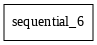


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 7.256894049346879}
    original datasize = 31963, initial batchsize = 32
    Early stopping : True
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 25000
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 15, number epochs = 50
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train into 80+20 percent: train and validation data
    Splitting valida

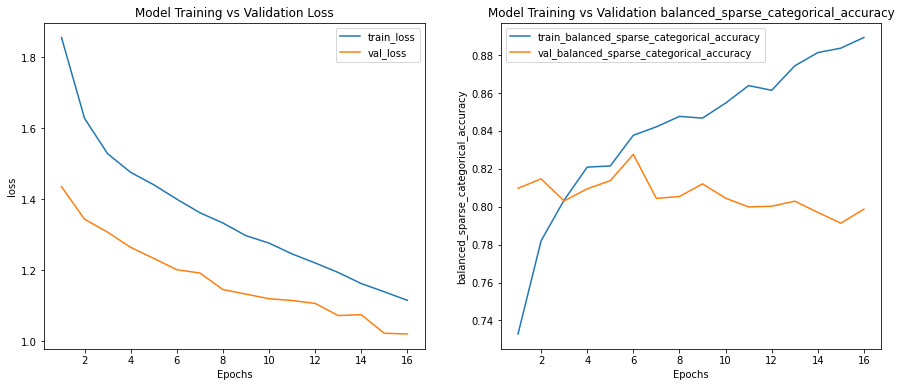

Time taken to train model (in mins) = 9
    Stopped epoch = 6
Held out data actuals shape: (3200,)
    samples from label: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Held out predictions shape:(3200,)
    Sample predictions: [0 0 0 0 1 0 0 0 0 0]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: label
#################################################################


    Accuracy          = 86.6%
    Balanced Accuracy = 81.9%
    Precision         = 30.5%
    Average Precision = 64.3%
    Recall            = 76.5%
    F1 Score          = 43.6%
    ROC AUC           = 85.7%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 8.350442e-05
    set learning rate using best model: 8.350442e-05
    max epochs for training = 6

Model not being saved since save_model_flag set to False...
6217

Saving vocab dictionary using pickle in Twitter_sentiment/auto/model_2021_11_07-17_22_56/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in Twitter_sentiment/auto/model_2021_11_07-17_22_56/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in Twitter_sentiment/auto/model_2021_11_07-17_22_56/artifacts/var_df.pickle...will take time...
    Saved pickle file in Twitter_sentiment/auto/model_2021_11_07-17_22_56/artifacts/var_df.

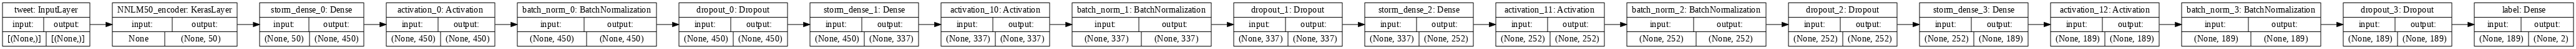

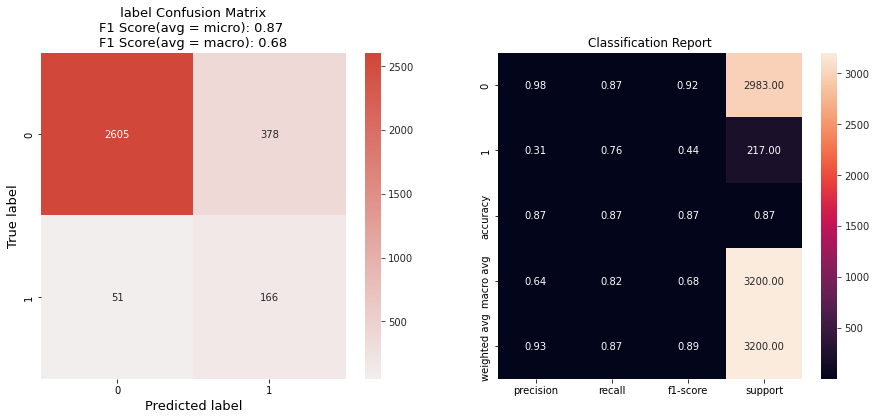

In [11]:
model, dicti = deepauto.fit(trainpath, target, keras_model_type=keras_model_type, 
                            project_name='Twitter_sentiment',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

In [12]:
testpath = '/content/test.csv'
predictions = deepauto.predict(model, project_name='Twitter_sentiment', test_dataset=testpath,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)


Loading deep_autoviml model from <tensorflow.python.keras.engine.functional.Functional object at 0x7f7b1c6c3e90> folder. This will take time...

Using <tensorflow.python.keras.engine.functional.Functional object at 0x7f7b1c6c3e90> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 17197
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    2 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 0, cats = 0, high cats = 0, very high cats = 1
Distribution of integer columns in da